In [63]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.preprocessing import StandardScaler
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [64]:
house_price=sklearn.datasets.load_boston()

In [65]:
df=pd.DataFrame(house_price.data,columns=house_price.feature_names)

In [66]:
df['price']=house_price.target

In [67]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [68]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [70]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [71]:
x=df.drop(columns=['price'])

In [72]:
y=df['price']


<AxesSubplot:>

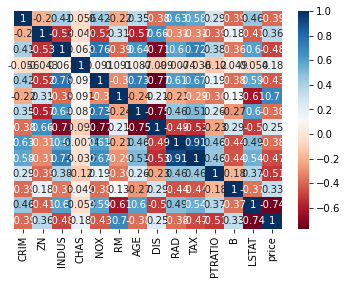

In [75]:
corr = df.corr()  #correlation
corr.shape

sns.heatmap(corr,annot=True,cmap='RdBu',yticklabels=False)

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.3)

In [81]:
ranfro=RandomForestRegressor()

In [82]:
ranfro.fit(x_train,y_train)

RandomForestRegressor()

In [85]:
train_model=ranfro.score(x_train,y_train)
test_model=ranfro.score(x_test,y_test)

In [87]:
test_model


0.9851328660885762

In [88]:
train_model

0.9851328660885762

In [91]:
y_pred=ranfro.predict(x_test)
y_pred

array([41.922, 18.966, 19.037, 31.013, 22.222, 21.229, 15.17 ,  7.399,
       20.513, 16.805, 13.495, 29.562, 34.935, 25.951,  6.417, 12.276,
       21.128, 15.137, 14.649, 22.398, 27.403, 44.793, 23.177, 24.151,
       11.954, 24.298, 19.171, 20.078, 20.225, 21.632, 15.22 , 34.885,
       19.582, 20.265, 17.173, 11.5  , 23.887, 33.446, 19.448, 23.082,
       16.342,  9.398, 20.165, 17.639, 20.213, 26.53 , 21.572, 17.577,
       27.317, 19.962, 27.656, 20.709, 46.2  , 19.122, 20.864, 20.229,
       48.882, 14.698, 29.15 , 20.43 , 20.207, 22.114, 32.659, 31.9  ,
       20.725, 22.5  , 33.234, 22.568, 27.215, 24.405, 24.21 , 26.123,
       17.1  , 30.153, 10.553, 19.968, 19.737, 27.518, 24.717, 15.341,
       26.491, 15.218, 12.869, 19.82 , 23.984, 11.647, 25.093, 11.059,
       20.966, 23.038, 20.309, 20.053, 20.929, 42.835, 27.458, 15.517,
       47.141, 13.646, 21.546, 35.216, 21.749, 21.363, 13.866, 20.362,
       32.659, 13.83 , 20.142, 17.684, 21.461, 40.265, 15.451, 10.993,
      

In [93]:
from sklearn.metrics import r2_score,mean_squared_error
score=r2_score(y_test,y_pred)

In [94]:
print(f'R^2 : {r2_score(y_test,y_pred)}')
print(f'MSE : {mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R^2 : 0.8421149919737625
MSE : 12.417729138157886
RMSE: 3.523879841617459
